In [15]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

images_dir = 'images_2'

In [16]:

df = pandas.read_csv(
    'results2.csv',
    #'results.csv',
    delimiter=';', 
    index_col=False,
    names=['time', 'filename', 'rows', 'strategy', 'nSim', 'piecesPlaced', 'solution_found', 'depth'])

# correct incorrectly recorded depth when score reached
df.loc[df['solution_found'] == 1, 'depth'] = df['rows'] * df['rows'] 

In [17]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10
...,...,...,...,...,...,...,...,...
3601,20-05-15 21:59:05,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,1000,1432132,0,51
3602,20-05-15 22:02:26,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,2000,2528307,0,42
3603,20-05-15 22:06:19,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,2000,3024021,0,56
3604,20-05-15 22:25:35,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,10000,14524839,0,51


In [18]:

df['pieces'] = df['rows'] * df['rows']

In [19]:
df['score'] = df['depth'] / df['pieces']

In [20]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10,16,0.625000
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10,16,0.625000
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10,16,0.625000
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10,16,0.625000
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10,16,0.625000
...,...,...,...,...,...,...,...,...,...,...
3601,20-05-15 21:59:05,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,1000,1432132,0,51,81,0.629630
3602,20-05-15 22:02:26,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,2000,2528307,0,42,81,0.518519
3603,20-05-15 22:06:19,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,2000,3024021,0,56,81,0.691358
3604,20-05-15 22:25:35,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,10000,14524839,0,51,81,0.629630


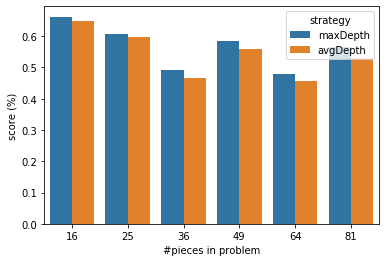

In [21]:
ax = sns.barplot(x='pieces', y='score', hue='strategy', data=df, ci=None)
ax.set(xlabel='#pieces in problem', ylabel='score (%)')
plt.savefig(images_dir + '/pieces_vs_score.png')
plt.show()

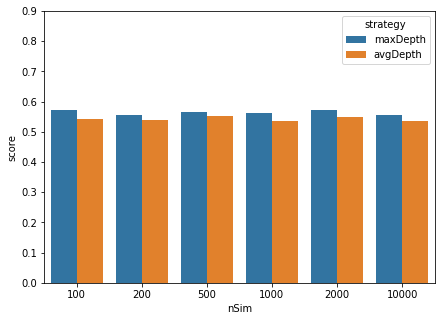

In [22]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x='nSim', y='score', hue='strategy', data=df, ci=None)

ax.set(ylim=[0, 0.9])
plt.savefig(images_dir + '/max_vs_avg.png')

In [99]:
df.groupby('nSim').mean()

,rows,piecesPlaced,solution_found,depth,pieces,score
nSim,,,,,,
100,6.491694,5.626321e+04,0.031561,24.375415,45.069767,0.558649
200,6.491694,1.076595e+05,0.029900,23.897010,45.069767,0.547702
500,6.491694,2.690720e+05,0.034884,24.421927,45.069767,0.559180
1000,6.500000,5.290348e+05,0.035000,23.898333,45.166667,0.549344
2000,6.500000,1.064165e+06,0.035000,24.555000,45.166667,0.561457
10000,6.500000,5.235907e+06,0.033333,23.771667,45.166667,0.546674


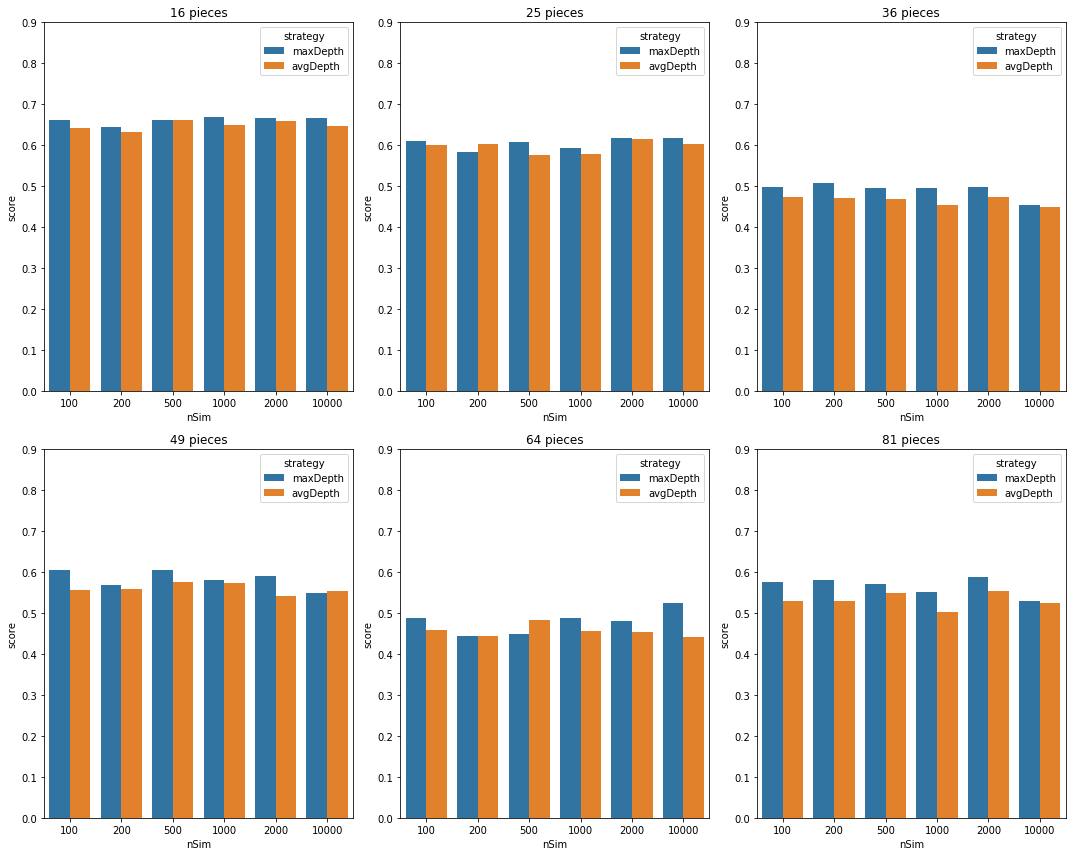

In [23]:
cols = 3
f, axes = plt.subplots(2, cols, figsize=(15, 12))
for i, pieces in enumerate(sorted(list(set(df['pieces'])))):
    _df = df[df['pieces'] == pieces]
    ax = sns.barplot(x='nSim', y='score', hue='strategy', data=_df, ci=None, ax=axes[i // cols][i %cols])
    ax.set_title(f"{pieces} pieces")
    ax.set(ylim=[0, 0.9])
# f.delaxes(axes[1, 2])
f.tight_layout()
plt.savefig(images_dir + '/n_sim_per_different_problems.png')
plt.show()
    

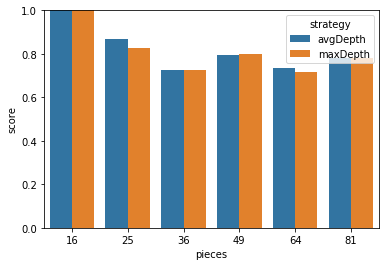

In [24]:
# get max value 
max_scores = df.groupby(['strategy', 'nSim', 'pieces']).agg({'score': 'max'}).reset_index()
ax = sns.barplot(x='pieces', y='score', hue='strategy', data=max_scores, ci=None)

ax.set(ylim=[0, 1.0])
plt.savefig(images_dir + '/maximum_values.png')

In [25]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(max_scores)

,strategy,nSim,pieces,score
0,avgDepth,100,16,1.000000
1,avgDepth,100,25,0.840000
2,avgDepth,100,36,0.750000
3,avgDepth,100,49,0.816327
4,avgDepth,100,64,0.812500
5,avgDepth,100,81,0.802469
6,avgDepth,200,16,1.000000
7,avgDepth,200,25,0.880000
8,avgDepth,200,36,0.722222
9,avgDepth,200,49,0.775510


In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10,16,0.625000
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10,16,0.625000
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10,16,0.625000
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10,16,0.625000
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10,16,0.625000
5,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,500,28633,0,10,16,0.625000
6,20-05-12 21:11:14,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,1000,57086,0,10,16,0.625000
7,20-05-12 21:11:15,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,1000,57086,0,10,16,0.625000
8,20-05-12 21:11:17,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,2000,113398,0,10,16,0.625000
9,20-05-12 21:11:18,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,2000,113398,0,10,16,0.625000


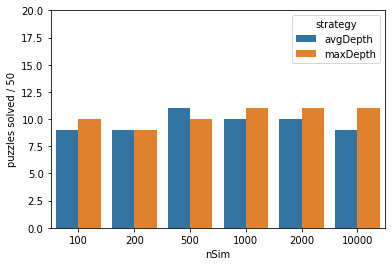

,nSim,strategy,time,filename,rows,piecesPlaced,solution_found,depth,pieces,score
0,100,avgDepth,9,9,9,9,9,9,9,9
1,100,maxDepth,10,10,10,10,10,10,10,10
2,200,avgDepth,9,9,9,9,9,9,9,9
3,200,maxDepth,9,9,9,9,9,9,9,9
4,500,avgDepth,11,11,11,11,11,11,11,11
5,500,maxDepth,10,10,10,10,10,10,10,10
6,1000,avgDepth,10,10,10,10,10,10,10,10
7,1000,maxDepth,11,11,11,11,11,11,11,11
8,2000,avgDepth,10,10,10,10,10,10,10,10
9,2000,maxDepth,11,11,11,11,11,11,11,11


In [98]:
# solutions found in total

_df = df[(df['pieces'] == 16) & (df['solution_found'] == True)].groupby(['nSim', 'strategy']).count()
_df = _df.reset_index()
#_df.groupby('solution_found')
ax = sns.barplot(x='nSim', y='solution_found', hue='strategy', data=_df, ci=None)
ax.set(xlabel='nSim', ylabel='puzzles solved / 50')
ax.set(ylim=[0, 20.0])
plt.savefig(images_dir + '/nsim_vs_solutions.png')
plt.show()
_df

In [29]:
df.count()

time              3606
filename          3606
rows              3606
strategy          3606
nSim              3606
piecesPlaced      3606
solution_found    3606
depth             3606
pieces            3606
score             3606
dtype: int64